<a href="https://colab.research.google.com/github/bedirhansarihan/house-price-prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data fetching
from google.colab import drive
drive.mount('/content/driver')

! mkdir ~/.kaggle
! cp /content/driver/MyDrive/ColabNotebooks/kaggle-api/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! pip install kaggle
! kaggle datasets download shree1992/housedata
! unzip housedata.zip

Mounted at /content/driver
Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 95.4MB/s]
Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Load data
df = pd.read_csv('data.csv')


## Data Exploration

In [ ]:
# check null values
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


There is no missing value so no need missing value handling

In [ ]:
# explore data types and unique value amounts
pd.DataFrame({'nunique': df.nunique(), 'dtypes': df.dtypes})


,nunique,dtypes
date,70,object
price,1741,float64
bedrooms,10,float64
bathrooms,26,float64
sqft_living,566,int64
sqft_lot,3113,int64
floors,6,float64
waterfront,2,int64
view,5,int64
condition,5,int64


In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64'])
cat_features = df.select_dtypes(include=['object'])


In [ ]:
# explore data distributions for numerical features
num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


numerical featurelar çok farklı scaledeler bu yüzden bu featurelara normalizasyon uygulanmalı.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

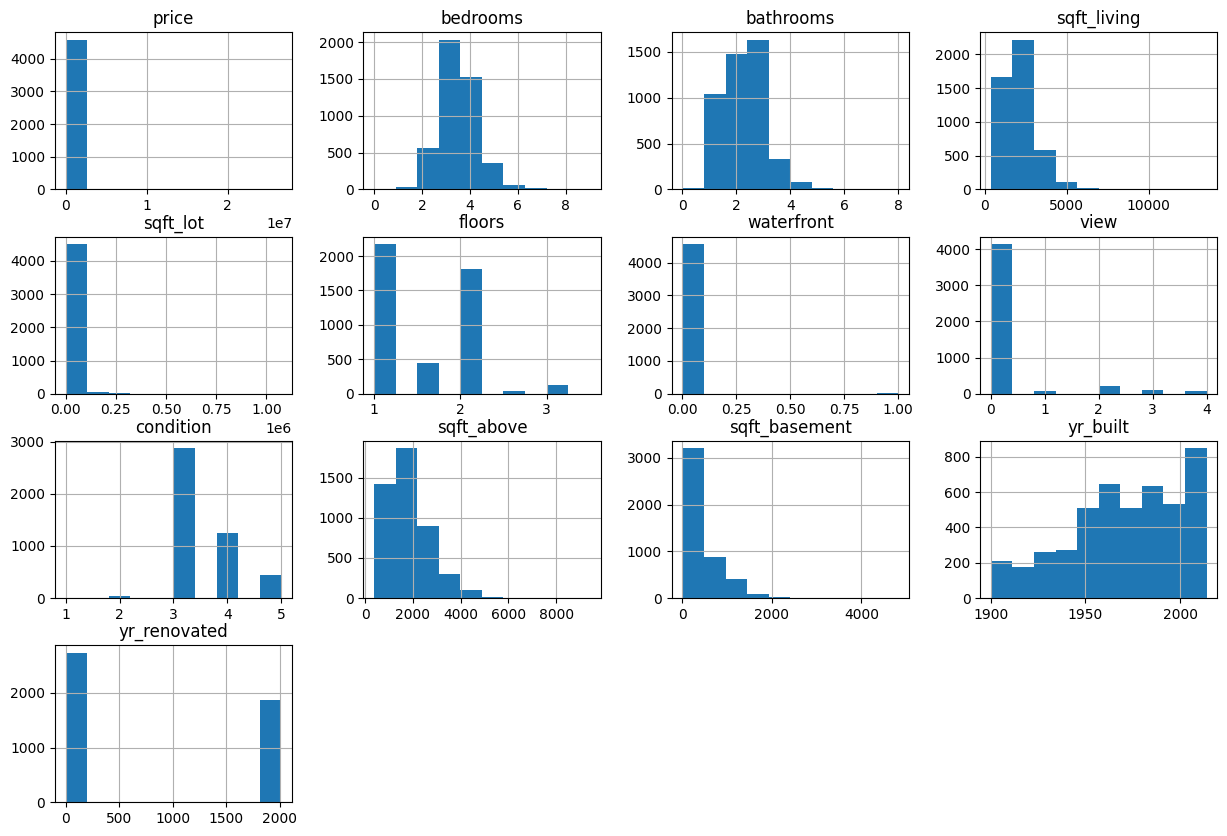

In [ ]:
# explore features on histogram
num_features.hist(figsize=(15, 10))


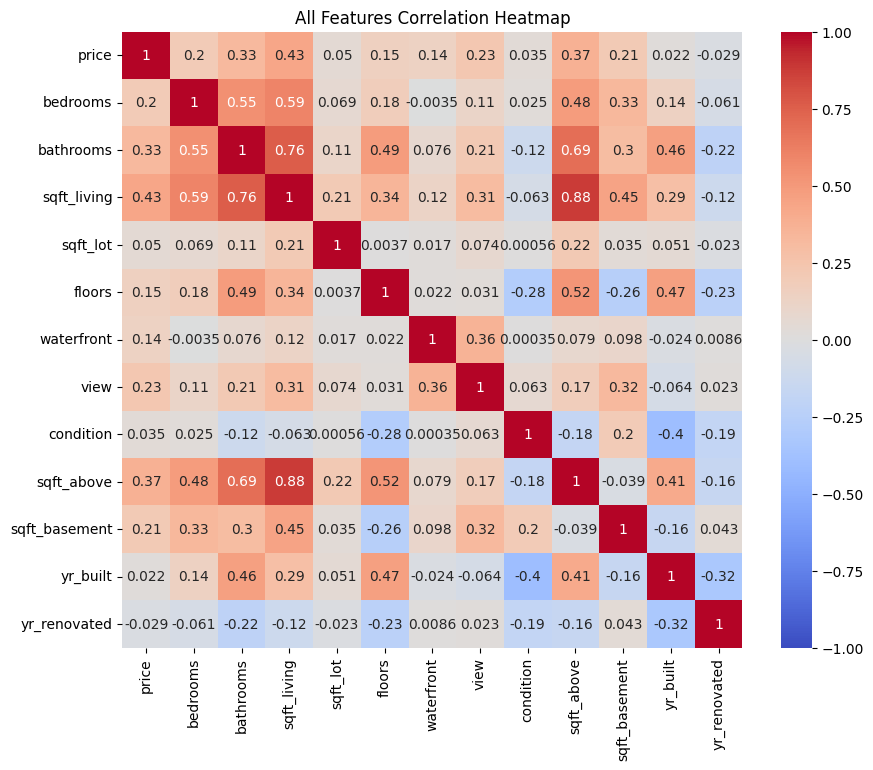

In [ ]:

correlation_matrix = num_features.corr()
price_corr = correlation_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("All Features Correlation Heatmap")
plt.show()

In [ ]:
top_corr_features = price_corr[1:6]
top_corr_features

,price
sqft_living,0.430410
sqft_above,0.367570
bathrooms,0.327110
view,0.228504
sqft_basement,0.210427


## Data Preprocessing

## Create Test set

sqft_living feature'ı price'ı belirlemek için en önemli feature olduğu için train-test splitinde test setinin representative olabilmesi için sqft_living feature'ı stratify .......... continue



<ipython-input-40-047c51978f84>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

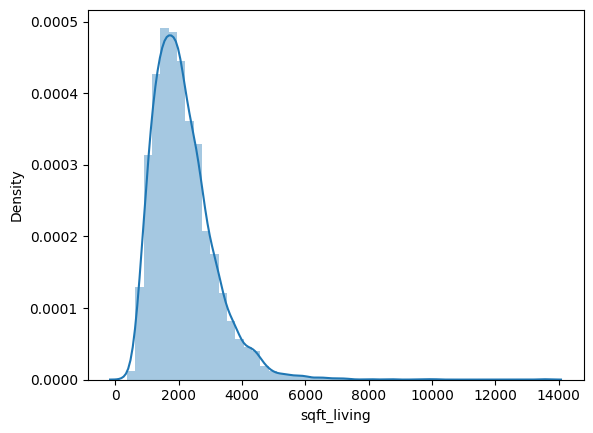

In [ ]:
sns.distplot(df.sqft_living)

<Axes: >

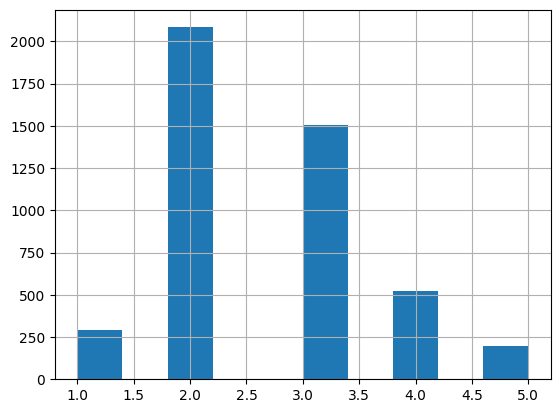

In [ ]:
# label those above 5 as 5
bins = [0, 1000, 2000, 3000, 4000, np.inf]
labels = [1, 2, 3, 4, 5]
df['sqft_living_cat'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

df['sqft_living_cat'].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df['sqft_living_cat']):
  strat_train_set = df.loc[train_idx]
  strat_test_set = df.loc[test_idx]

strat_test_set.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sqft_living_cat
1808,2014-06-03 00:00:00,430000.0,4.0,2.25,1790,7203,1.0,0,0,4,1110,680,1973,0,19534 34th Ave NE,Lake Forest Park,WA 98155,USA,2
349,2014-05-08 00:00:00,235000.0,2.0,1.00,1270,3008,1.0,0,0,4,650,620,1923,0,4305 S Webster St,Seattle,WA 98118,USA,2
566,2014-05-13 00:00:00,287000.0,3.0,2.25,1490,9600,1.0,0,0,4,1170,320,1987,0,27020 NE Ring St,Duvall,WA 98019,USA,2
765,2014-05-15 00:00:00,343000.0,4.0,1.75,2290,10290,1.0,0,0,3,1340,950,1960,2012,2816 SW 110th Pl,Seattle,WA 98146,USA,3
2621,2014-06-16 00:00:00,435000.0,3.0,2.00,1980,2674,3.0,0,0,3,1980,0,2007,0,5451 Fauntleroy Way SW,Seattle,WA 98136,USA,2


In [ ]:
def sqft_living_cat_props(data):
  return data['sqft_living_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'overall': sqft_living_cat_props(df),
    'stratified': sqft_living_cat_props(strat_test_set),
    'random': sqft_living_cat_props(test_set)

})

compare_props['Rand. %error'] = 100 * compare_props['random'] / compare_props['overall'] - 100
compare_props['strat. %error'] = 100 * compare_props['stratified'] / compare_props['overall'] - 100

compare_props

,overall,stratified,random,Rand. %error,strat. %error
sqft_living_cat,,,,,
2,0.452826,0.453261,0.463043,2.256361,0.096015
3,0.326739,0.327174,0.326087,-0.199601,0.133067
4,0.113913,0.114130,0.115217,1.145038,0.190840
1,0.063696,0.063043,0.052174,-18.088737,-1.023891
5,0.042826,0.042391,0.043478,1.522843,-1.015228


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
std_scalar